In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('data/marketing.csv',sep = ';')

In [3]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 1 to 8993
Data columns (total 14 columns):
Sex                 8990 non-null object
MaritalStatus       8991 non-null object
Age                 8991 non-null float64
Education           8992 non-null object
Occupation          8981 non-null object
YearsInSf           8993 non-null object
DualIncome          8993 non-null int64
HouseholdMembers    8989 non-null object
Under18             8993 non-null int64
HouseholdStatus     8990 non-null object
TypeOfHome          8993 non-null object
EthnicClass         8989 non-null object
Language            8992 non-null object
AnualIncome         8987 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
1,2,1,5.0,4,5,5,3,3,0,Own,1,7,?,76004
2,Male,1,5.0,5,5,5,3,5,2,Own,1,7,1,76004
3,2,1,3.0,5,1,5,2,3,1,Rent,3,7,1,34000
4,2,5,1.0,2,6,5,1,4,2,Live with Parents/Family,1,7,1,9136
5,2,5,1.0,2,6,3,1,4,2,Live with Parents/Family,1,7,1,9136


In [4]:
df.isnull().sum()

Sex                  3
MaritalStatus        2
Age                  2
Education            1
Occupation          12
YearsInSf            0
DualIncome           0
HouseholdMembers     4
Under18              0
HouseholdStatus      3
TypeOfHome           0
EthnicClass          4
Language             1
AnualIncome          6
dtype: int64

In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique())

Sex
['2' 'Male' '8' nan '9']
MaritalStatus
['1' '5' '3' '2' '4' '?' nan]
Age
[ 5.  3.  1.  6.  2.  7.  4. nan]
Education
['4' '5' '2' '3' '6' nan '1' '?']
Occupation
['5' '1' '6' '8' '9' '3' '2' '?' nan '4' '7']
YearsInSf
['5' '3' '4' '2' '1' '?']
DualIncome
[3 2 1]
HouseholdMembers
['3' '5' '4' '2' '1' nan '6' '?' '7' '8' '9']
Under18
[0 2 1 3 4 5 6 8 7 9]
HouseholdStatus
['Own' 'Rent' 'Live with Parents/Family' nan '?' 'Rental'
 'Live with Parents' 'Live with Family' 'Live with Fam']
TypeOfHome
['1' '3' '5' '2' '4' '?']
EthnicClass
['7' '5' '2' '3' '8' '4' '1' '?' '6' nan]
Language
['?' '1' '2' '3' nan]
AnualIncome
['76004' '34000' '9136' '66994' '32171' '11703' '21672' '46894'
 '7600000000000000004' '27591' '19997' '253600' '35500' '7' '7540' '?' nan
 '91000000000036' '468940000000000000000000000000' '5740' '460' '15500'
 '2460' '9460' '150500' '75500']


In [6]:
df = df.replace('?',np.nan)
df = df.replace({
    'Male':'1',
    '8':np.nan,
    '9':np.nan
})
df = df.dropna()

In [7]:
df.isnull().sum()

Sex                 0
MaritalStatus       0
Age                 0
Education           0
Occupation          0
YearsInSf           0
DualIncome          0
HouseholdMembers    0
Under18             0
HouseholdStatus     0
TypeOfHome          0
EthnicClass         0
Language            0
AnualIncome         0
dtype: int64

In [15]:
df.describe()

,Age,DualIncome,Under18,AnualIncome
count,5884.000000,5884.000000,5884.000000,5.884000e+03
mean,3.212441,1.517505,0.686268,1.546571e+10
std,1.400107,0.696900,1.019014,1.186329e+12
min,1.000000,1.000000,0.000000,7.000000e+00
25%,2.000000,1.000000,0.000000,1.170300e+04
50%,3.000000,1.000000,0.000000,3.217100e+04
75%,4.000000,2.000000,1.000000,6.699400e+04
max,7.000000,3.000000,7.000000,9.100000e+13


In [8]:
df.loc[df['Sex'] == 'Male']['Sex'].count()



0

In [9]:
df.loc[df['Sex'] == 'Female']['Sex'].count()


0

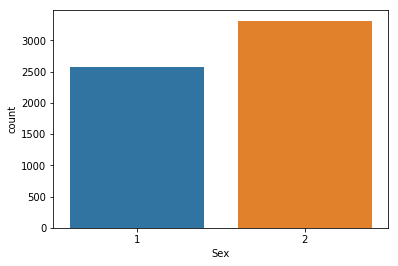

In [10]:
sns.countplot(data=df, x='Sex')


In [11]:
df.loc[df['HouseholdStatus'] == 'Live with Parents/Family', :]['HouseholdStatus'].count()


1212

In [ ]:
df['AnualIncome'].unique()


In [16]:
outliers = ['91000000000036', '150500', '253600']
df = df.loc[~df['AnualIncome'].isin(outliers), :]

In [17]:
df['AnualIncome'] = df['AnualIncome'].apply(int)

df.groupby('Occupation')['Occupation', 'AnualIncome'].sum().sort_values(by='AnualIncome', ascending=False)


,AnualIncome
Occupation,
1,109084187
4,25088526
6,21248459
5,20392370
2,19038048
3,16672524
7,4055158
